# Data Analysis: Exoplanet Transit

Computational skills:
- Loading and displaying data sets
- Plot markers 
- Labelling plot features (lines and labels)
- Data separation 
- Formula building
- Error analysis

In this exercise, you will be analysing data from the transit of an exoplanet around its host star. Just like our own Sun, lots of stars have one or more planets orbitting around them. These are called exoplanets. 

They were first detected by an experiment which watched the brightness of a star over a long period of time. What the astronomers noticed was that, periodically, the brightness of the star would decrease for a time before eventually returning to its usual level of brightness. This was interpretted as a planet passing in front of the the star and blocking some of its light, causing the star to appear dimmer to us. This method of exoplanet detection is called the transit method.

Insert: image showing exoplanet transit?

Since the transit method was developed, it has been used to identify over 4,000 exoplanets in our galaxy. By observing the transit of an exoplanet in front of its host star, numerous features of the system can be calculated, including the radius of the planet. 

### Import the tools we will need to complete the analysis

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

### Import the data

To visualise the transit of the exoplanet across its star, we need to create something called a light curve. This is a plot which shows how the brightness of the host star changes over time. Therefore, we need two data files: the times the star was observed at, and the brightnesses which were recorded for those times (known as 'flux').

These can be found in the 'times.txt' and 'fluxes.txt' text files provided. In the following cell, use the np.loadtxt function to load in these data files.

In [22]:
fluxes = np.loadtxt('fluxes.txt')
times = np.loadtxt('times.txt')

### Plot the light curve

A light curve is a plot of the star's flux as a function of time. Create this curve by plotting the time on the x-axis, and the flux on the y-axis. Remember to put labels on your x and y axes.

Text(0, 0.5, 'Normalised Flux')

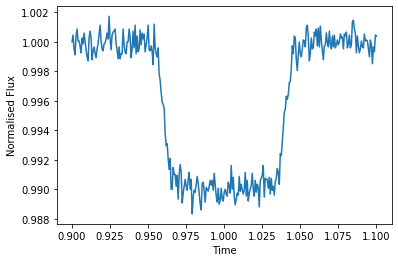

In [25]:
plt.plot(times, fluxes)
plt.xlabel('Time')
plt.ylabel('Normalised Flux')

You should see a pattern which shows the stars brightness starting at 1 (this is a normalised flux, and so here 1 corresponds to 100% usual brightness, 0.99 to 99% usual brightness, etc), and then decreasing quite quickly. It stays at this minimum for a time, and then increases quite quickly again to 1.


### Insert time markers

There are three important points during an exoplanet transit: the ingress (when the planet begins to pass in front of the star), the egress (when the planet finishes passing in front of the star), and the transit midpoint. 

Let's place a vertical line at each of these points in order to make them clearer to see on the plot. For this, we can use plt.axvline(x=xvalue). Here, you will need to alter what you put in for 'xvalue' until you feel it appropriately corresponds with the ingress (brightness starts to decrease), midpoint (middle of transit), or egress (brightness returns to full level) point.

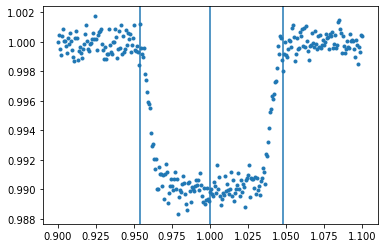

In [46]:
plt.plot(times,fluxes,'.')
plt.axvline(x=0.954)
plt.axvline(x=1)
plt.axvline(x=1.048)

### Adding descriptions to plots

Our vertical lines help us to highlight important moments in our plot. However, in their current form they are hard to tell apart. 

In order to identify more clearly what each line represents, we can insert some text on our plot beside our lines saying what they are. This can be done using this matplotlib function - plt.text(x,y,'Place text here',color='color',rotation=90), where x and y are the positions at which you would like your text to appear, and the rotation function rotates the text to be parallel with the lines. Try plotting text beside the ingress, midpoint, and egress lines, and changing their colors. 



Text(1.004, 0.994, 'Midpoint')

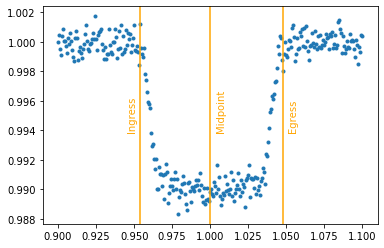

In [7]:
#Place vertical markers at the ingress, egress, and midpoint times

plt.plot(times, fluxes, '.')

#Ingress
plt.axvline(x=0.954, color='orange')
plt.text(0.945, 0.994,'Ingress', color='orange', rotation=90)
#Full transit start
# plt.axvline(x=0.964, color='yellow')

#Full transit end
# plt.axvline(x=1.0365, color='yellow')

#Egress
plt.axvline(x=1.048, color='orange')
plt.text(1.051, 0.994,'Egress', color='orange', rotation=90)

#Midpoint
plt.axvline(x=1,color='orange')
plt.text(1.004,0.994, 'Midpoint', color='orange', rotation=90)



Once we have our vertical lines denoting the ingress and egress placed on our plot, why don't we insert a horizontal line which spans the duration of the transit?

You can do this using the plt.axhline(x_min, x_max, y, color='color'), where x_min and x_max are the minimum and maximum x values we would like our horizontal line to go between (in this case, our ingress and egress), and y is the y value at which we want the line placed. Place a text label beside this horizontal line to show it is the 'Duration of Transit' (for this, you may want to use rotation=0)

(0.984, 1.004)

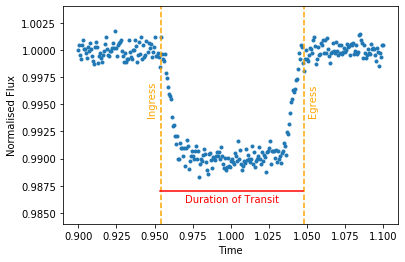

In [8]:
plt.plot(times,fluxes, '.')

#Ingress
plt.axvline(x=0.954, linestyle='dashed', color='orange')
plt.text(0.945, 0.994,'Ingress', color='orange', rotation=90)

#Egress
plt.axvline(x=1.048, linestyle='dashed', color='orange')
plt.text(1.051, 0.994,'Egress', color='orange', rotation=90)

plt.axhline(0.987,0.29,0.715, color='red')
plt.text(0.97,0.986, 'Duration of Transit', color='red', rotation=0)



plt.xlabel('Time')
plt.ylabel('Normalised Flux')

plt.ylim(0.984,1.004)

### Brightness Calculations

Often, astronomers want to know by how much the brightness of a star decreases when the planet passes in front of it, as we can use this information to calculate the size of the planet. 


Create a new list which contains a selection of data points from the transit minimum (the flat section of lowest brightness). Then, use the function np.mean(list) to calculate the mean flux value of the transit minimum. 

In [11]:
#Create a list of transit minimum data

min_flux = []
min_time = []

for i in range(len(fluxes)):
    if times[i] >= 0.964 and times[i] <=1.0365:
        min_flux.append(fluxes[i])
        min_time.append(times[i])
        
min_average = np.mean(min_flux)
print('Average brightness during transit: ',min_average)

Average brightness during transit:  0.9901622940818181


#### Calculate the change in brightness

We want to know by what percentage the star's brightness dims as the planet passes in front of it. Calculate this change in brightness using the value calculated in the last question, and assuming the out-of-transit brightness is given by 1. 

Comment on your result, and whether it seems reasonable.

In [12]:
#Calculate the out-of-transit and in-transit average flux values

flux_difference = 1 - min_average

print('Change in flux value over duration of transit: ', np.round(flux_difference,4))



Change in flux value over duration of transit:  0.0098


### Calculate the radius of the exoplanet

Need to mess around w the values to make it realistic

Once we know the change in flux during the transit - how much the star's brightness appears to decrease - it is possible to calculate the radius of the transitting exoplanet if the radius of the host star is know. 

$$
 \frac{\Delta F}{F} = \frac{R_p^2}{R_s^2}   
$$

Where F is the full out-of-transit flux, $\Delta$F is the change in flux, $R_p$ is the radius of the planet, and $R_*$ is the radius of the host star. The radius of this exoplanets host star is $\approx$0.2$R_{\odot}$ (where $R_{\odot}$ is the solar radius, and equals 1.69$\times$10$^5$km). 

Use this information and the change in brightness calculated previously to estimate the radius of the exoplanet. (Hint: rearrange the above equation for $R_p$, and write a function which will calculate $R_p$ when you input $\Delta$F, F, and $R_s$).

In [50]:
def R_p(F, ΔF, R_s):
    return np.sqrt((R_s)**2*(ΔF/F))

Rp = R_p(1, flux_difference, 1*(1.69*10**5))
print('Radius of the exoplanet: ',Rp,'km')

Radius of the exoplanet:  16762.30052019093 km


Express your answer as a fraction of the radius of the Earth. (Note: $R_E$=6371km)

In [51]:
frac = Rp/6371
print('Radius of exoplanet: ', frac, 'R_E')

Radius of exoplanet:  2.631031316934693 R_E


### Errors

In [ ]:
#Error calculated using counts (perhaps too complex)

When a star is observed, its brightness is recorded in counts (corresponding to the number of photons from the star hitting the telescope). Recall that if we have N counts, the error on our value will be $\sqrt{N}$. If we have the full data set (i.e. non-normalised), we will be able to calculate the error on each point by taking its square root.

Import the new data set 'fluxes_real.txt', which gives you the raw data collected from the star (not normalised to 1). Write a loop which calculates the error at each point and adds it to a new list called flux_error. Then, use the matplotlib function plt.errorbar(x,y,yerror,fmt='|') to put the errors on your plot.

<ErrorbarContainer object of 3 artists>

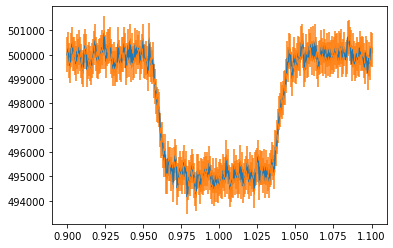

In [27]:
#Convert to counts
full_flux = fluxes*500000 #Question here around what we want this section to prove, that data which looks good ruined by errors?

err = []
for i in range(len(full_flux)):
    err.append(np.sqrt(full_flux[i]))
    
err = np.array(err)
    
plt.plot(times,full_flux)
plt.errorbar(times,full_flux, err, fmt='|')

In [ ]:
#Supply error data sets

As an alternatively to calculating the error using the square root of the counts (if the introduction of the idea of counts is too complex/specific), we could provide the students with two sets of errors, saying that the transit was observed on two nights and they had different conditions, and so different errors. One of these would have small errors, and the other very large errors which dominate the transit data to the extent that the transit is no longer visible. 

The intention here is to 1. have students familiarise themselves with plotting and displaying errors in python, and 2. to have students consider how important errors are when drawing conclusions from data

<ErrorbarContainer object of 3 artists>

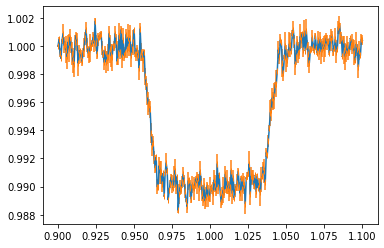

In [66]:
#Small errors (these will be given in a text file and students would not have to generate them)

import random

small_error = []
for i in range(len(fluxes)):
    r = random.uniform(0,0.001) #Maximum error of 0.1%
    small_error.append(r)
    

plt.plot(times,fluxes)
plt.errorbar(times,fluxes, small_error, fmt='|')


<ErrorbarContainer object of 3 artists>

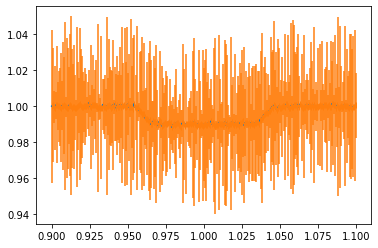

In [67]:
#Large errors

big_error = []
for i in range(len(fluxes)):
    r = random.uniform(0,0.05) #Error of 5%
    big_error.append(r)
    

plt.plot(times,fluxes)
plt.errorbar(times,fluxes, big_error, fmt='|')

## Extra calculations

#### Habitable Zone Calculations

In [ ]:
#A. Habitable zone calculation

One way of classifying exoplanets is whether or not they are in something called the 'habitable zone' of their star. This zone is the area around a star where it is not too hot nor too cold for liquid water to exist on the surface of the planets located there. As far as we know, liquid water is needed for life to form. Therefore, if a planet lies in the habitable zone of its star it may be suitable for hosting life.

We can calculate the effective surface temperature of an exoplanet using: $$T_{eff} = T_*\sqrt{\frac{R_*}{a}}$$ where  $T_*$ is the surface temperature of the host star, $R_*$ is the radius of the host star, and $a$ is the semi-major axis of the planets orbit (similar to the radius of an elliptical orbit). 

If the effective temperature of the star is 4,500K and the semi-major axis of the planet is 1.8AU (=2.693e+11 m), determine whether or not the studied exoplanet is in the habitable zone. 

Do this by creating a code for the function of $T_{eff}$ above, and substituting the values for $T_*$, $a$, and $R_*$ given.

In [53]:
def Tp(Ts, Rs, a):
    return Ts*np.sqrt(Rs/a)

T_exo = Tp(4500,1*(1.69*10**8),2.693e11)
print('Effective surface temperature of the exoplanet: ', T_exo, 'K')

Effective surface temperature of the exoplanet:  112.729528199295 K


In [ ]:
#B. Determining the habitable zone around a star

For a given star of radius $R_*$ and effective surface temperature $T_*$, we can calculate where the habitable zone starts and ends. This corresponds to the region bounded by the closest and furthest semi-major axis $a$ which gives a surface temperature between 273.15K and 373.15K - the temperature range in which liquid water can exist.

Build a loop which, for various semi-major axes $a$ (distance from the star), calculates the effective surface temperature of an exoplanet at that distance. Append the distances which fall within the habitable zone to their own list, and from this determine where the habitable zone starts and ends. 

Test semi-major axes between 0.2AU and 5AU.

In [58]:
habitable_a = []


AU = np.linspace(0.2*1.496e+11, 5*1.496e+11, 5000)

for i in range(len(AU)):
    T_planet = Tp(4500,1.69*10**8, AU[i])
    if T_planet > 273.15 and T_planet < 373.15:
        habitable_a.append(AU[i])
        
print('Beginning of habitable zone: ',np.min(habitable_a)/1.496e+11, 'AU')
print('End of habitable zone: ', np.round(np.max(habitable_a)/1.496e+11,4), 'AU')
    

Beginning of habitable zone:  0.2 AU
End of habitable zone:  0.3066 AU


#### Modelling 

In [ ]:
#Inserting a straight line to compare change in brightness with?

Perhaps we want to show how the light curve of a star with an exoplanet differs to one without an exoplanet, or we want to make a model of the flux we would expect from the star if there was no exoplanet. We can use this to compare our transit data with. 

For data points which are more than three standard deviations away from the full brightness, replace them with a flux value of 1. 

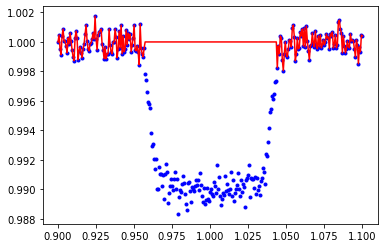

In [45]:
#First, create a list of data points which has only out-of-transit flux values

normal_flux = []
for i in range(len(fluxes)):
    if times[i] <= 0.954 or times[i] > 1.048: #These times are based on the x positions used to place markers for flux minima earlier
        normal_flux.append(fluxes[i])

#Calculate the standard deviation of this data set
normal_sd = np.std(normal_flux)


no_exo = []
for i in range(len(fluxes)):
    if fluxes[i] < 1-3*normal_sd:
        no_exo.append(1)
    else:
        no_exo.append(fluxes[i])
        
        
plt.plot(times,fluxes,'b.')
plt.plot(times,no_exo,'r-')


Possible Example: 

Probably too advanced, but if we wanted to make the no-exoplanet model more realistic we could have the data we substitute in for the transit data to vary in a similar way to that of the real out-of-transit data. Could do this using a Monte Carlo simulation which adds on or takes away a random percentage of the standard deviation to each data point (the more I type this the more advanced it seems, but a simplified version may be a way to demonstrate Monte Carlo applications in modelling).

In [ ]:
#Identifying data points which lie a particular number of standard deviations away from the full mean 

Perhaps a way of introducing some statistics w/ astronomy - what is a statistically significant dip in flux? Could discuss how the out-of-transit flux data does vary and why, and so how can we tell what variations are exoplanets and what are distortions/seeing/airmass etc 

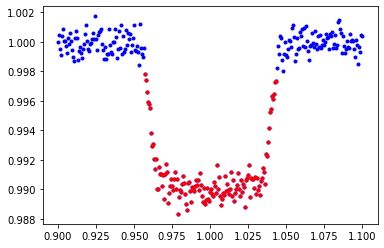

In [42]:
#First, create a list of data points which has only out-of-transit flux values

normal_flux = []
for i in range(len(fluxes)):
    if times[i] <= 0.954 or times[i] > 1.048: #These times are based on the x positions used to place markers for flux minima earlier
        normal_flux.append(fluxes[i])

#Calculate the standard deviation of this data set
normal_sd = np.std(normal_flux)

#Useful 
#Create a data set which contains all data points which lie 3σ from the mean
flux_threeσ = []
time_threeσ = [] #better way to generate the corresponding times for plotting?
for i in range(len(fluxes)):
    if fluxes[i] > 1+3*normal_sd or fluxes[i] < 1-3*normal_sd:
        flux_threeσ.append(fluxes[i])
        time_threeσ.append(times[i])

 
#Plot both data sets??
plt.plot(times,fluxes,'b.')
plt.plot(time_threeσ, flux_threeσ, 'r.')




Could then have students interpretting this data and prompted towards thinking about statistical significance in observations

In [ ]:
#model fitting?

In [ ]:
#Other values we can calculate? Something about the habitable zone? 